In [157]:
import matplotlib.pyplot as plt


In [180]:
m_val = 2000
t = m_val


In [181]:
non_taxable = 510
min_salary = 740
iin = 0.255
vsaa_employee = 0.105
vsaa_employer = 0.2359 # goes on top of gross salary
uin = 0.255


In [182]:
def calculate(gross_salary, pensions=False, do_p3=False):
    vsaa_tax = vsaa_employee*gross_salary
    pension = 0
    if pensions:
        pension = 0.06*gross_salary
    taxable_income = gross_salary-non_taxable-vsaa_tax
    net_salary = gross_salary-vsaa_tax-iin*taxable_income
    if do_p3:
        p3_payment = min(gross_salary/10, 4000/12)
        net_salary -= (1-iin)*p3_payment
        pension += p3_payment
    employer_expenses = (vsaa_employer+1)*gross_salary
    return (net_salary, employer_expenses, (1-uin)*(t-employer_expenses), pension)
    

In [183]:
t = calculate(m_val)[1]


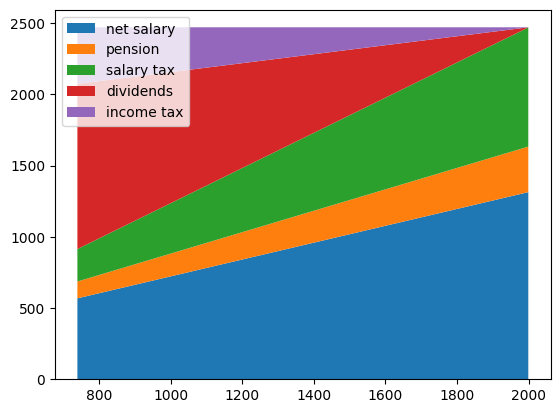

In [184]:
x = range(min_salary, m_val)

data = [calculate(i, True, True) for i in x]
net_salaries = [d[0] for d in data]
dividends = [d[2] for d in data]
pension = [d[3] for d in data]
salary_tax = [d[1]-d[0]-d[3] for d in data]
tax = [t-net_salaries[i]-dividends[i]-salary_tax[i]-pension[i] for i in range(len(net_salaries))]

# Basic stacked area chart.
plt.stackplot(x, net_salaries, pension, salary_tax, dividends, tax, labels=['net salary', 'pension', 'salary tax', 'dividends', 'income tax'])
plt.legend(loc='upper left')
